In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data['Genre'] = data['Genre'].map({'Male': 0, 'Female': 1})

In [4]:
scaler = StandardScaler()
numerical_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


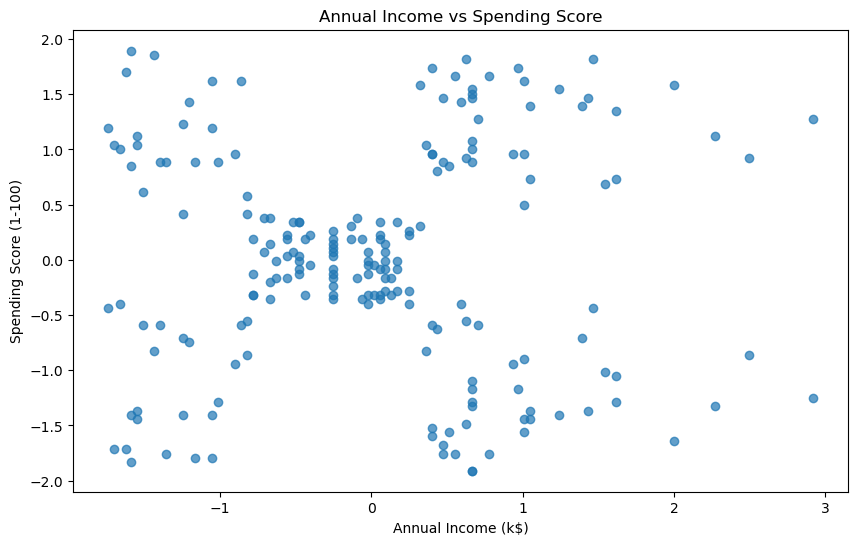

In [5]:
def plot_income_spending(data):
    """
    Creates scatter plot showing relationship between annual income and spending score.
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], alpha=0.7)
    plt.title('Annual Income vs Spending Score')
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.show()

plot_income_spending(data)

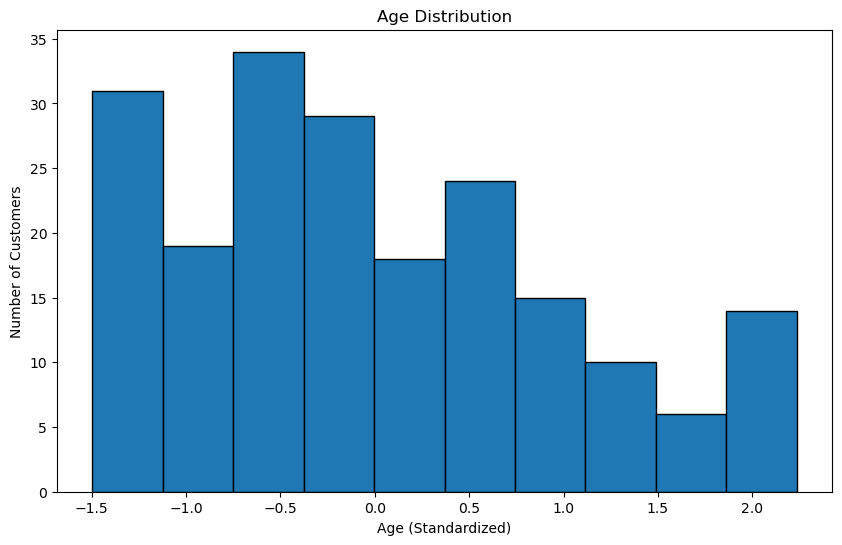

In [6]:
def plot_age_distribution(data):
    """
    Creates histogram showing distribution of customer ages.
    """
    plt.figure(figsize=(10, 6))
    plt.hist(data['Age'], bins=10, edgecolor='black')
    plt.title('Age Distribution')
    plt.xlabel('Age (Standardized)')
    plt.ylabel('Number of Customers')
    plt.show()

plot_age_distribution(data)

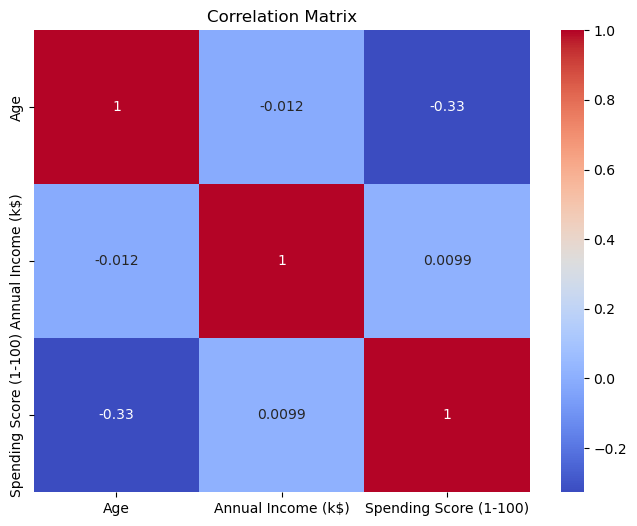

In [7]:
def plot_correlation_matrix(data, numerical_cols):
    """
    Creates heatmap showing correlations between numerical features in data.
    """
    plt.figure(figsize=(8, 6))
    sns.heatmap(data[numerical_cols].corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()

plot_correlation_matrix(data, numerical_cols)

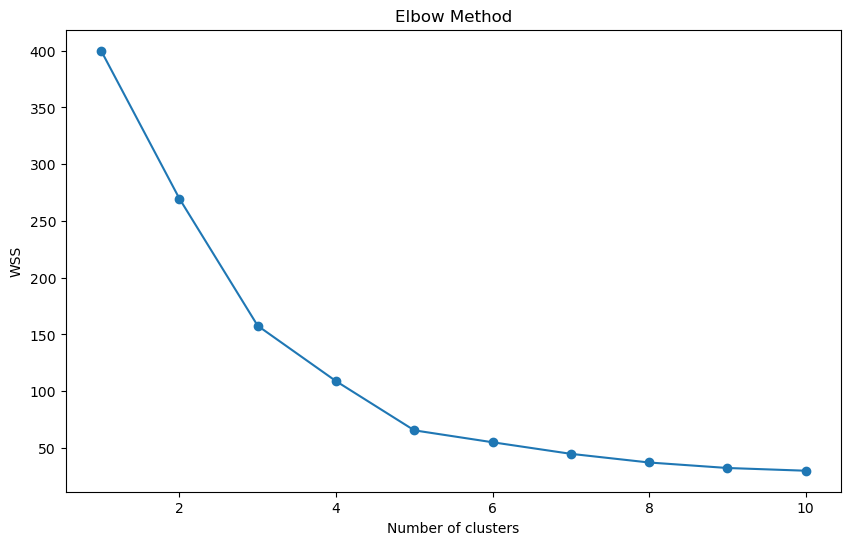

In [8]:
def calculate_elbow_method(data):
    """
    Calculate Within-Cluster-Sum of Squared Errors (WSS) for different values of k
    and plot elbow graph to help with selecting number of clusters.
    """
    wss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(data)
        wss.append(kmeans.inertia_)
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 11), wss, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WSS')
    plt.show()
    return wss

wss = calculate_elbow_method(data[['Annual Income (k$)', 'Spending Score (1-100)']])

In [10]:
def calculate_silhouette_scores(data):
    """
    Calculate silhouette scores for different values of k to help with selecting number of clusters.
    """
    silhouette_scores = []
    for i in range(2, 11):
        kmeans = KMeans(n_clusters=i, random_state=42)
        labels = kmeans.fit_predict(data)
        score = silhouette_score(data, labels)
        silhouette_scores.append(score)
        print(f'Silhouette Score for {i} clusters: {score}')
    return silhouette_scores
    
silhouette_scores = calculate_silhouette_scores(data[['Annual Income (k$)', 'Spending Score (1-100)']])

Silhouette Score for 2 clusters: 0.3212707813918878
Silhouette Score for 3 clusters: 0.46658474419000145
Silhouette Score for 4 clusters: 0.4939069237513199
Silhouette Score for 5 clusters: 0.5546571631111091
Silhouette Score for 6 clusters: 0.5398800926790663
Silhouette Score for 7 clusters: 0.5281492781108291
Silhouette Score for 8 clusters: 0.4552147906587443
Silhouette Score for 9 clusters: 0.4570853966942764
Silhouette Score for 10 clusters: 0.4431713026508046


In [12]:
def perform_kmeans(data, n_clusters=5):
    """
    Performs K-Means clustering on data.
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(data[numerical_cols])
    data['Cluster'] = cluster_labels
    return kmeans
    
kmeans_model = perform_kmeans(data)    

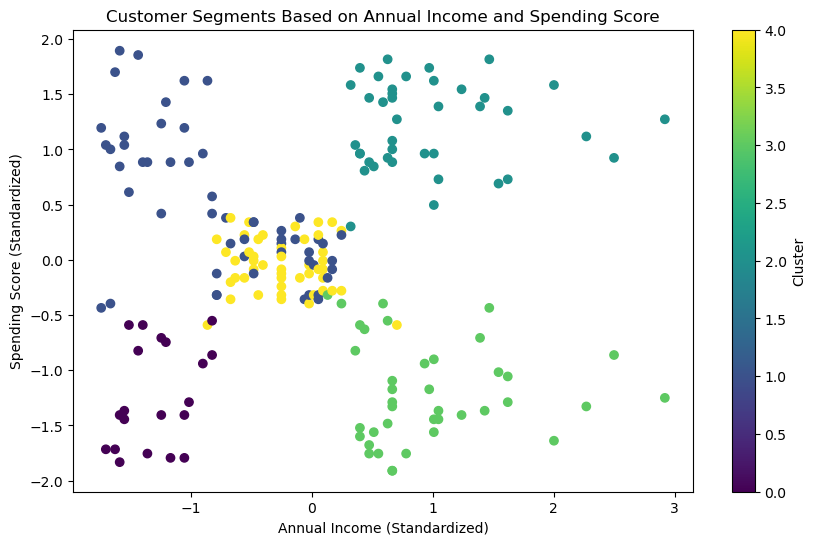

In [13]:
def plot_clusters(data):
    """
    Plots data points with different colors for each cluster.
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis')
    plt.title('Customer Segments Based on Annual Income and Spending Score')
    plt.xlabel('Annual Income (Standardized)')
    plt.ylabel('Spending Score (Standardized)')
    plt.colorbar(label='Cluster')
    plt.show()

plot_clusters(data)

In [14]:
def perform_linear_fitting(data):
    """
    Performs linear regression fitting on data and evaluates model.
    """
    reg = LinearRegression()
    X = data[['Annual Income (k$)']].values.reshape(-1, 1)
    y = data['Spending Score (1-100)'].values
    reg.fit(X, y)
    
    # Make predictions using the model
    y_pred = reg.predict(X)
    
    # Calculate evaluation metrics
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, y_pred)
    
    # Return the model and the metrics
    return reg, mae, mse, rmse, r2

reg_model = perform_linear_fitting(data)

In [16]:
# Function for Descriptive Statistics
def generate_descriptive_statistics(data):
    """
    Generates descriptive statistics for dataset, including measures of central tendency,
    dispersion and shape of the dataset’s distribution.
    """
    desc_stats = data.describe()
    additional_stats = pd.DataFrame({
        'skewness': data.skew(),
        'kurtosis': data.kurt()
    }).transpose()
    return pd.concat([desc_stats, additional_stats], axis=0)


In [17]:
# Function to print and return descriptive statistics and correlation matrix
def descriptive_statistics_and_correlation(data):
    """
    Prints and returns descriptive statistics and correlation matrix of data.
    """
    descriptive_stats = generate_descriptive_statistics(data)
    correlation_matrix = data.corr()
    
    print("\nDescriptive Statistics:")
    print(descriptive_stats)
    print("\nCorrelation Matrix:")
    print(correlation_matrix)
    
    return descriptive_stats, correlation_matrix

descriptive_stats, correlation_matrix = descriptive_statistics_and_correlation(data[numerical_cols])


Descriptive Statistics:
                   Age  Annual Income (k$)  Spending Score (1-100)
count     2.000000e+02        2.000000e+02            2.000000e+02
mean     -1.021405e-16       -2.131628e-16           -1.465494e-16
std       1.002509e+00        1.002509e+00            1.002509e+00
min      -1.496335e+00       -1.738999e+00           -1.910021e+00
25%      -7.248436e-01       -7.275093e-01           -5.997931e-01
50%      -2.045351e-01        3.587926e-02           -7.764312e-03
75%       7.284319e-01        6.656748e-01            8.851316e-01
max       2.235532e+00        2.917671e+00            1.894492e+00
skewness  4.855689e-01        3.218425e-01           -4.722020e-02
kurtosis -6.715729e-01       -9.848709e-02           -8.266291e-01

Correlation Matrix:
                             Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.000000           -0.012398               -0.327227
Annual Income (k$)     -0.012398            1.000000           

In [18]:
model, mae, mse, rmse, r2 = perform_linear_fitting(data)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Absolute Error (MAE): 0.81
Mean Squared Error (MSE): 1.00
Root Mean Squared Error (RMSE): 1.00
R-squared (R²): 0.00


In [19]:
reg_model, mae, mse, rmse, r2 = perform_linear_fitting(data)

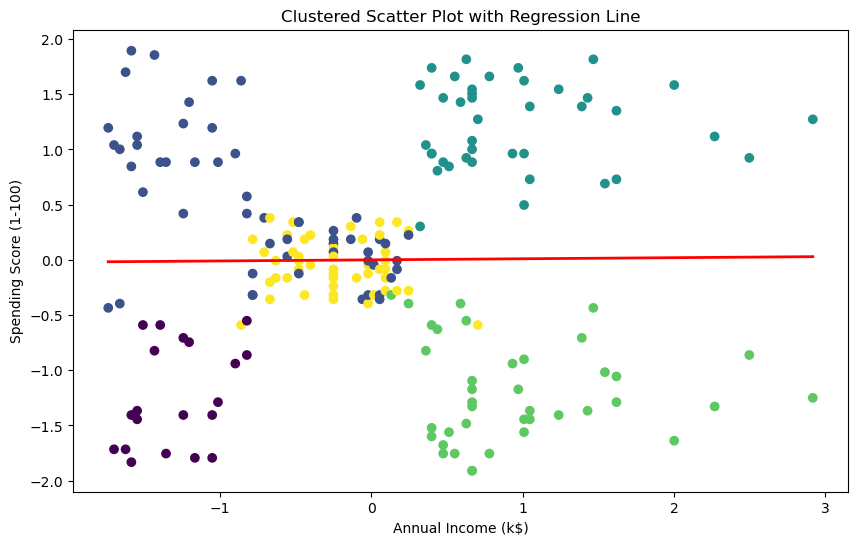

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis')
plt.plot(data['Annual Income (k$)'], reg_model.predict(data[['Annual Income (k$)']].values), color='red', linewidth=2)
plt.title('Clustered Scatter Plot with Regression Line')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()